In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
df = pd.read_csv('ushape.csv')


In [15]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [16]:
#plt.scatter(df['X'],df['Y'],c=df['class'])

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense

2024-10-09 16:17:24.811383: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 16:17:24.826920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 16:17:24.831707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 16:17:24.843253: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 16:17:29.174144: W tensorflow/compiler/tf2

In [17]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Set parameters to 0
model.get_weights()

[array([[ 0.12953228, -0.06867141, -0.32333377,  0.5292339 ,  0.42319244,
          0.1557926 , -0.2481367 , -0.6064154 , -0.00841606,  0.05586529],
        [-0.6913961 ,  0.42704827, -0.5821006 ,  0.34029502, -0.5876584 ,
         -0.47906905, -0.49092025,  0.33228725,  0.2382155 ,  0.48531753]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.34007293],
        [ 0.70068735],
        [-0.73474234],
        [ 0.27462572],
        [-0.1439184 ],
        [ 0.7076475 ],
        [-0.07233185],
        [ 0.15130794],
        [ 0.2676695 ],
        [-0.17964119]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
initial_weights = model.get_weights()

In [20]:
initial_weights[0]= np.zeros(model.get_weights()[0].shape)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.zeros(model.get_weights()[2].shape)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)

In [21]:
model.set_weights(initial_weights)

In [22]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5007 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5046 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5281 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5432 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4836 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5500 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5383 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss:

In [25]:
model.get_weights()

[array([[ 0.4174029 ,  0.4174029 ,  0.4174029 ,  0.4174029 ,  0.41740295,
          0.41740295,  0.41740295,  0.41740295,  0.41740295,  0.41740295],
        [-0.45324725, -0.45324725, -0.45324725, -0.45324725, -0.45324728,
         -0.45324728, -0.45324728, -0.45324728, -0.45324728, -0.45324728]],
       dtype=float32),
 array([-0.12271551, -0.12271551, -0.12271551, -0.12271551, -0.12271552,
        -0.12271552, -0.12271552, -0.12271552, -0.1227155 , -0.1227155 ],
       dtype=float32),
 array([[0.04992171],
        [0.04992171],
        [0.04992171],
        [0.04992171],
        [0.04992173],
        [0.04992173],
        [0.04992173],
        [0.04992173],
        [0.04992173],
        [0.04992173]], dtype=float32),
 array([-0.05386698], dtype=float32)]

3888/3888 ━━━━━━━━━━━━━━━━━━━━ 4s 920us/step


<Axes: >

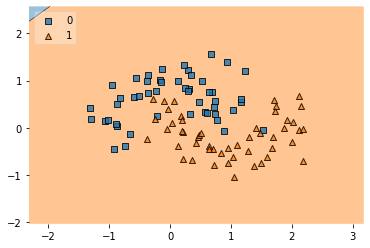

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)